Assignment 1
2 You will implement classification algorithms that you have seen in class as
part of this question. You will be provided train and test data as before, of which you are only
supposed to use the train data to come up with a classifier which you will use to just make
predictions on the test data. For each sub-question below, plot the test data along with your
classification boundary and report confusion matrices on both train and test data. Again, your
code should generate a .csv file with your predictions on the test data as before.


(a)  Implement the Preceptron learning algorithm with starting weights as w =[0,0,1]T for x = [1,x,y]T and with a margin of 1

In [11]:
######################################################
#PRML Assignment 1
#Question 2
######################################################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import time

Generate CSV to store all results of our predictions

In [12]:

def GenerateCSV(x,y,label,filename):
    header = ['x', 'y', 'Label']
    itr=0
  
    with open('CSV\\'+filename+'Results_'+time.strftime("%Y%m%d-%H%M%S")+'.csv', 'w', encoding='UTF8') as f:
        writer = csv.writer(f)
        # write the header
        writer.writerow(header)
        # write the data
        for i in x:
            writer.writerow([x[itr], y[itr], label[itr]])
            itr=itr+1

def ConvertDataToMatrix(x_data,y_data):
    size=x_data.shape[0]
    x=np.ones((size,1))
    x1=np.array(x_data)
    x2=np.array(y_data)
    x= np.concatenate((x,np.reshape(x2,(x2.shape[0],1))),axis=0)
    x= np.concatenate((x,np.reshape(x2,(x2.shape[0],1))),axis=1)    
    return x


Following Functions defined to perform prediction based on a input data

In [13]:

    
def GenerateSeparator(w,x,y):
    x_matrix=ConvertDataToMatrix(x,y)
    result= np.array(np.dot(w,x_matrix.T).T)
    return result

def PerformPredictionTestData(w,x,y,colourP,colourN,title):
 
    w=np.array(w)
    label=w[0][2]*y+w[0][1]*x+w[0][0]
    outputLabel = [0 if (x <0) else 1 for x in label ]
    flags_P = [False if (x <0) else True for x in label ]
    flags_N = [True if (x <0) else False for x in label ]
    label_Positive_X=x[flags_P]
    
    label_Positive_Y=y[flags_P]
    label_Negative_X=x[flags_N]
    label_Negative_Y=y[flags_N]
    plt.title(title)
    plt.scatter(label_Positive_X,label_Positive_Y,s=50, color=colourP,label ='1')
    plt.scatter(label_Negative_X,label_Negative_Y,s=50, color=colourN,label ='0')
    plt.legend( loc ="lower left")
    return outputLabel

  

Read Traing and Test Data from CSV

In [14]:
def ReadData():
    train_Data=pd.read_csv("classification_train_data.csv")
    test_Data=pd.read_csv("classification_test_data.csv")
    #training data
    x_train=train_Data['x']
    y_train=train_Data['y']
    label_train=train_Data['label']
    #test data
    x_test=test_Data['x']
    y_test=test_Data['y']
    label_test=test_Data['label']
    return train_Data,test_Data,x_train,y_train,label_train,x_test,y_test,label_test

In [15]:
'''
Use basic formula y=mx+c.
Use parameter of w to fetch the slope m.
'''
def DrawSlope(w,x):
    w=np.array(w)
    slope = -(w[0][2])/(w[0][1])  
    intercept = 0
    y = (slope*x) + intercept
    plt.plot(x,y,'-y')

Following function used to generate Confusion Matrix

In [16]:
  
def PrintConfusionMatrix(predict,actual):
   
    data = {'y_Actual':    predict,
        'y_Predicted': actual
        }

    df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])

    confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
    print (confusion_matrix)

Confusion matrix for training data
Predicted  0.0  1.0
Actual             
0           90    0
1            0  110
Confusion matrix for training data
Predicted  0.0  1.0
Actual             
0           59    0
1            0   41


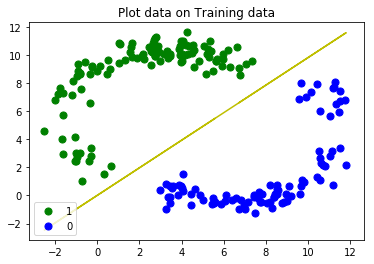

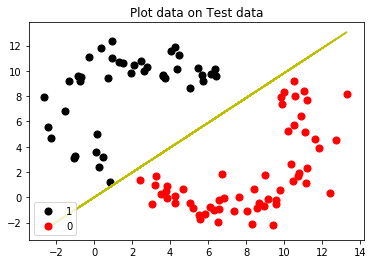

In [20]:

#Read training data
train_Data,test_Data,x_train,y_train,label_train,x_test,y_test,label_test=ReadData()

MARGIN=1
train_df=np.array(train_Data)
w_plane=np.matrix([0,0,1])
#print(array)
maxNumOfIteration=300
train_Datasize=train_df.shape[0]
ConvergeCount=0

#Run the condition till we get a perfact plane 
while  ConvergeCount!=train_Datasize and maxNumOfIteration>0:
   
    ConvergeCount=train_Datasize
    for xy in train_df:
        
        data_matrix=np.array([1,xy[0],xy[1]])
        temp_Matrix_mul=np.dot(w_plane, data_matrix.T)
        
        y_label=xy[2] if xy[2]>0 else -1
        temp_Matrix_mul=temp_Matrix_mul*(y_label)
        
        #Verify if we have found mismatch
        if temp_Matrix_mul <=MARGIN:
            w_plane=np.add(w_plane,y_label*data_matrix)
            ConvergeCount=ConvergeCount-1
           
    maxNumOfIteration=maxNumOfIteration-1


#plot training data
plt.figure()
colourPostivePoint='green'
colourNegetivePoint='Blue'
title="Plot data on Training data"
result=PerformPredictionTestData(w_plane,x_train,y_train,colourPostivePoint,colourNegetivePoint,title)
DrawSlope(w_plane,x_train)
print('Confusion matrix for training data')
PrintConfusionMatrix(result,label_train)

#plot Test data
plt.figure()
colourPostivePoint='black'
colourNegetivePoint='red'
title="Plot data on Test data"
result=PerformPredictionTestData(w_plane,x_test,y_test,colourPostivePoint,colourNegetivePoint,title)
DrawSlope(w_plane,x_test)

#Highlight prediction results
GenerateCSV(x_test,y_test,result,"Question2_a_")
print('Confusion matrix for training data')
PrintConfusionMatrix(result,label_test)


Question 2. 
B)Calculate (code it up!) a Discriminant Function for the two classes assuming
Normal distribution when the covraiance matrices for both the classes are equal and
C1 = C2 = σ2I for some σ

If Σi = σ^2I, then the discriminant function gi is given by
gi(x) = w^T x+ w0
where
wi = μi/σ2 , and wi0 = −‖μi‖^2/2σ2 + log πi. 